Uwaga! Poniżej znajdują się dane przedstawione w module 13.

Od wiersza 36 (pod nagłówkiem "Model zmiennych kategorycznych") zaczynają się obliczenia metryk wykonane w ramach realizacji zadania "pozostałe metryki".

In [1]:
import pandas as pd
bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data_raw

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [2]:
bike_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [3]:
bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
display(bike_data_raw)
print(bike_data_raw.info())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  rentals     731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB
None


In [4]:
bike_data_raw['rentals'].describe()

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: rentals, dtype: float64

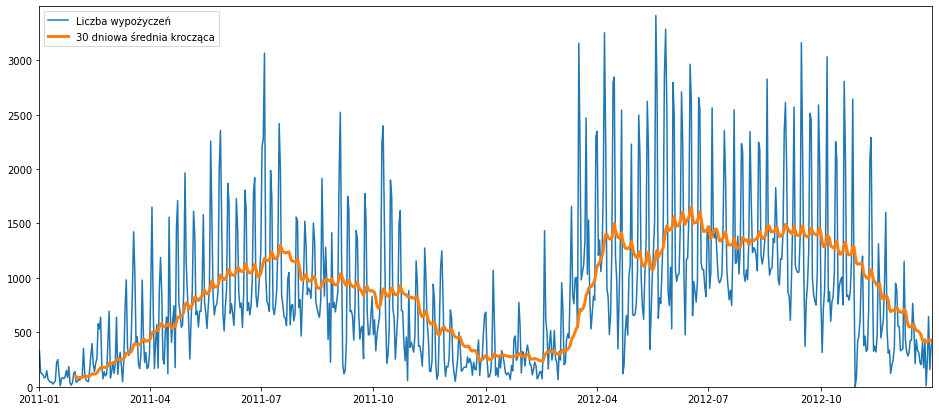

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 7))
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'], label='Liczba wypożyczeń')
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'].rolling(30).mean(), linewidth=3.0, label='30 dniowa średnia krocząca')
plt.xlim([bike_data_raw['dteday'].min(), bike_data_raw['dteday'].max()])
plt.ylim([0, bike_data_raw['rentals'].max()*1.025])
plt.legend(loc='upper left')
plt.show()

In [5]:
print('Przed usunięciem:')
display(bike_data_raw)
print('Po usunięciu:')
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)
display(bike_data)

Przed usunięciem:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


Po usunięciu:


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [6]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

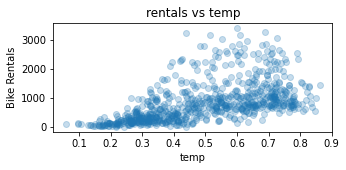

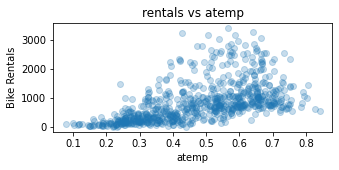

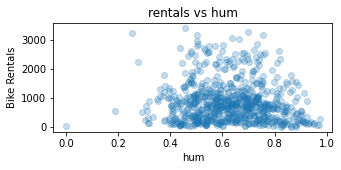

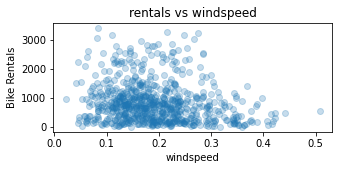

In [8]:
for numeric_feature in numeric_features:
    fig = plt.figure(figsize=(5, 2))
    plt.scatter(bike_data[numeric_feature], bike_data[target], alpha=0.25)
    plt.xlabel(numeric_feature)
    plt.ylabel('Bike Rentals')
    plt.title(f'rentals vs {numeric_feature}')
    plt.show()

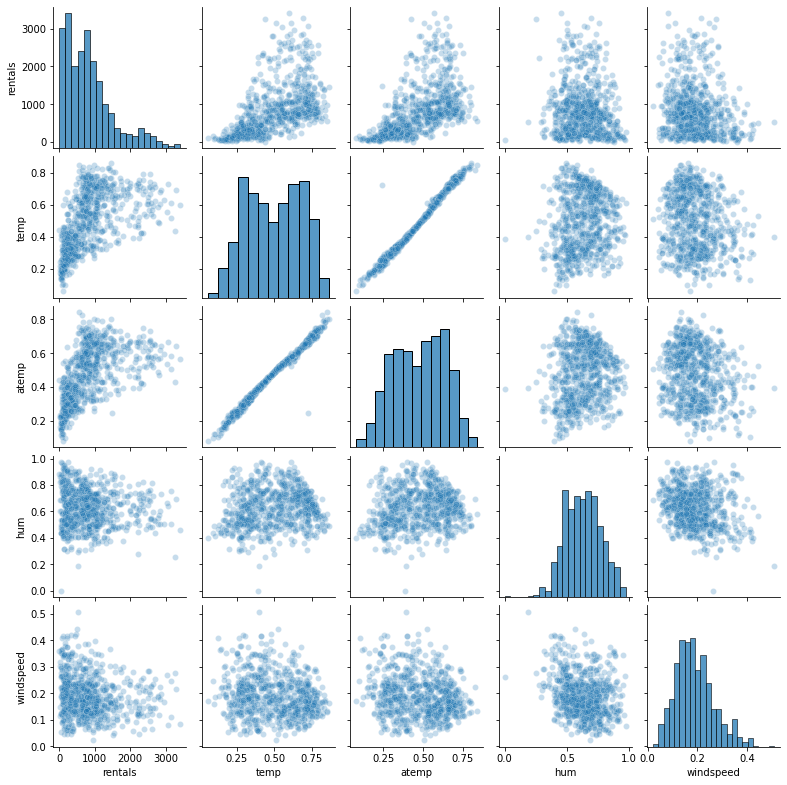

In [10]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

fig = sns.pairplot(bike_data[[target]+numeric_features], kind='scatter', plot_kws={'alpha': 0.25})
fig.fig.set_size_inches(11, 11) #ustawiamy rozmiar wykresu
plt.show()

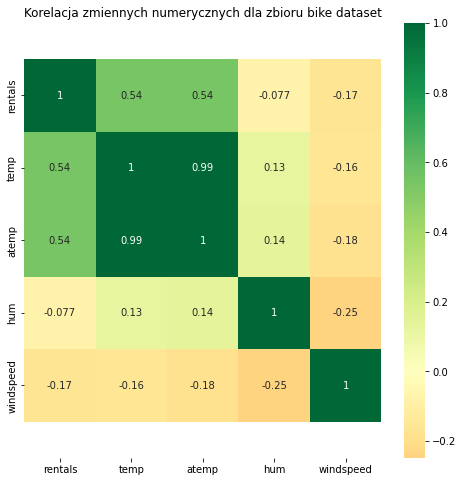

In [11]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(bike_data[[target]+numeric_features].corr(),
                 xticklabels=bike_data[[target]+numeric_features].corr().columns,
                 yticklabels=bike_data[[target]+numeric_features].corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja zmiennych numerycznych dla zbioru bike dataset', fontsize=12)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [12]:
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
bike_data[['rentals', 'temp', 'difference_temp']].corr()

,rentals,temp,difference_temp
rentals,1.000000,0.543285,-0.310423
temp,0.543285,1.000000,-0.599254
difference_temp,-0.310423,-0.599254,1.000000


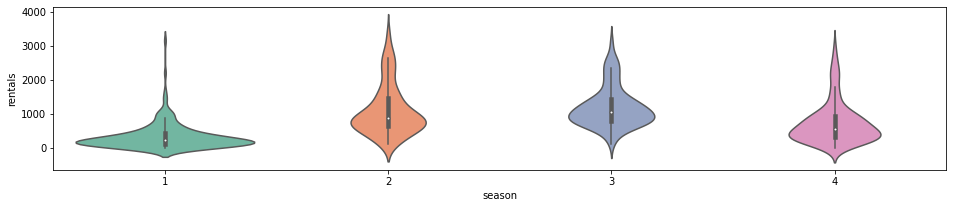

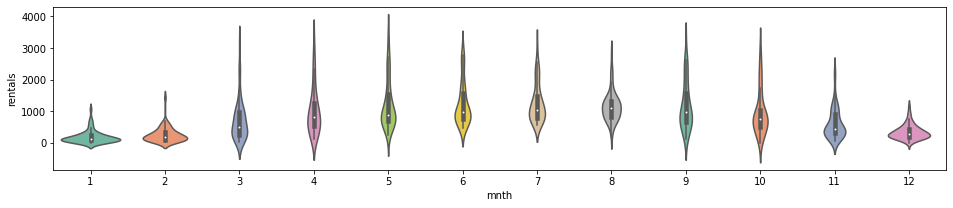

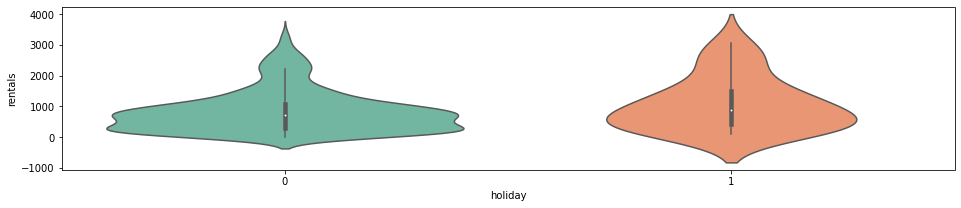

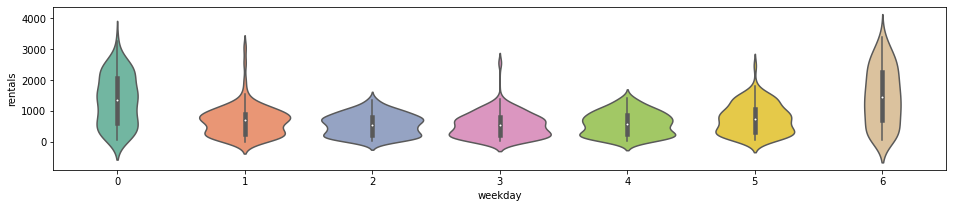

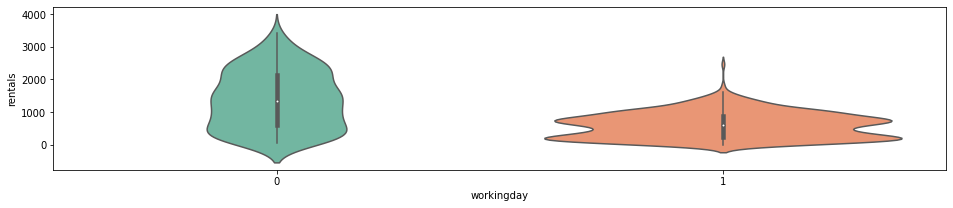

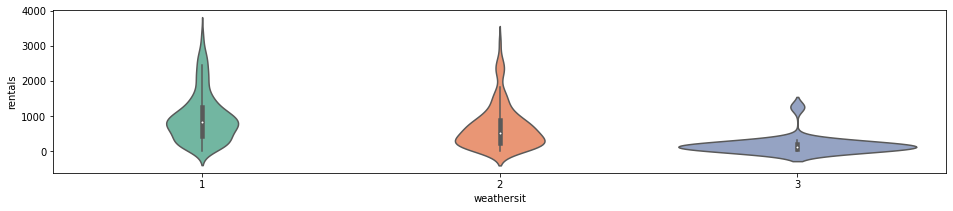

In [13]:
for categoric_features in categorical_features:
    plt.figure(figsize=(16, 3))
    sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")
    plt.show()

In [23]:
bike_data.groupby('weathersit').sum()

,season,mnth,holiday,weekday,workingday,temp,hum,windspeed,rentals,difference_temp
weathersit,,,,,,,,,,
1,1157,2992,15,1367,307,236.843696,261.870203,88.086965,446346,-14.957939
2,606,1604,6,757,177,116.180341,179.294035,46.048407,169776,-6.206592
3,62,170,0,67,16,9.102243,17.826322,5.110049,3895,-0.961686


# Regresja liniowa jednej zmiennej

In [14]:
print(f'Numeric features: {numeric_features}')
print(f'Categorical features: {categorical_features}')
print(f'Target: {target}')
display(bike_data)

Numeric features: ['temp', 'difference_temp', 'hum', 'windspeed']
Categorical features: ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
Target: rentals


,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals,difference_temp
0,1,1,0,6,0,2,0.344167,0.805833,0.160446,331,0.056537
1,1,1,0,0,0,2,0.363478,0.696087,0.248539,131,-0.026794
2,1,1,0,1,1,1,0.196364,0.437273,0.248309,120,-0.035439
3,1,1,0,2,1,1,0.200000,0.590435,0.160296,108,0.060610
4,1,1,0,3,1,1,0.226957,0.436957,0.186900,82,0.010191
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,-0.108295
727,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,0.006762
728,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,-0.043157
729,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,-0.094331


In [15]:
X = bike_data[['temp']].copy()
y = bike_data[target].copy()
print('X:')
print(X.values[:3])
print('\ny:')
print(y.values[:3])

X:
[[0.344167]
 [0.363478]
 [0.196364]]

y:
[331 131 120]


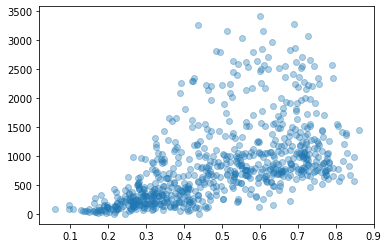

In [16]:
plt.scatter(X, y, alpha=0.35)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f'X.shape: {X.shape}, y.shape {y.shape}')
print()
print(f'X_train.shape: {X_train.shape}, y_train.shape {y_train.shape}')
print(f'X_test.shape: {X_test.shape}, y_test.shape {y_test.shape}')

X.shape: (731, 1), y.shape (731,)

X_train.shape: (584, 1), y_train.shape (584,)
X_test.shape: (147, 1), y_test.shape (147,)


In [18]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression() # inicjalizacja modelu
lr_model.fit(X_train, y_train) # trenowanie modelu

LinearRegression()

In [19]:
print(lr_model.intercept_)
print(lr_model.coef_)

-179.96286312537404
[1990.31869846]


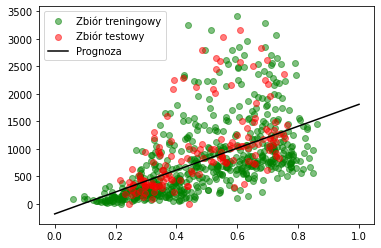

In [20]:
import numpy as np
X_linspace = np.linspace(0, 1, 100)
y_fitted = lr_model.intercept_ + lr_model.coef_ * X_linspace

# Rysowanie wykresu
plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Zbiór treningowy')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Zbiór testowy')
plt.plot(X_linspace, y_fitted, color='black', label='Prognoza')
plt.legend(loc='upper left')

plt.show()

In [21]:
X_new = [[0.3],
         [0.7]]
predicted_data = lr_model.predict(X_new)
print(predicted_data)

[ 417.13274641 1213.2602258 ]


C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

In [23]:
print('Predykcja:')
print(np.round(y_predict_test[:5]).astype(int))
print('Wartość prawdziwa:')
print(y_test.values[:5])

Predykcja:
[1285 1313 1324 1245 1198]
Wartość prawdziwa:
[1278 1263 1196 1065 2247]


Współczynnik determinacji R2

In [24]:
from sklearn.metrics import r2_score
print(f'Train R^2: {r2_score(y_train, y_predict_train)}')

Train R^2: 0.30617863454631344


MAE - Mean Absolute Error (średni błąd absolutny)

In [25]:
from sklearn.metrics import mean_absolute_error
print(f'Train MAE: {mean_absolute_error(y_train, y_predict_train)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_predict_test)}')

Train MAE: 404.8339599752615
Test MAE: 391.02879410802956


MAPE - Mean Absolute Percentage Error (średni błąd procentowy)

In [26]:
from sklearn.metrics import mean_absolute_percentage_error
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, y_predict_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, y_predict_test)}')

Train MAPE: 0.9668581511778538
Test MAPE: 2.9864925318560496


MSE - Mean Squared Error (średni błąd kwadratowy)

In [27]:
from sklearn.metrics import mean_squared_error
print(f'Train MSE: {mean_squared_error(y_train, y_predict_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_predict_test)}')

Train MSE: 317745.94124252343
Test MSE: 397066.9447179113


RMSE – Root Mean Squared Error (pierwiastek błędu średniokwadratowego)

In [28]:
from math import sqrt
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, y_predict_train))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, y_predict_test))}')

Train RMSE: 563.6895787953894
Test RMSE: 630.1324818781454


Wykres reszt

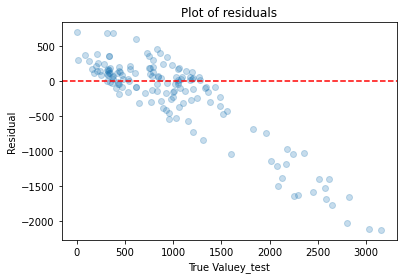

In [29]:
errors = y_predict_test - y_test
plt.scatter(x = y_test, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()

Histogram reszt

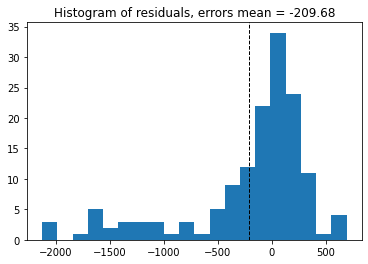

In [30]:
plt.hist(errors, bins = 20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

# Regresja wielomianowa

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


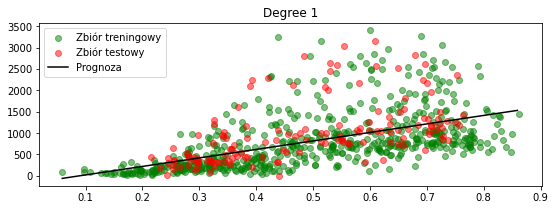

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


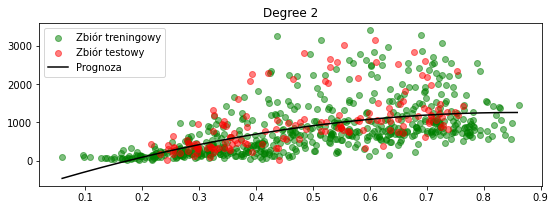

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


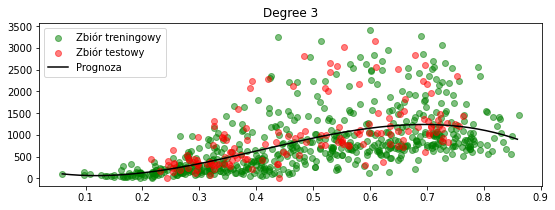

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


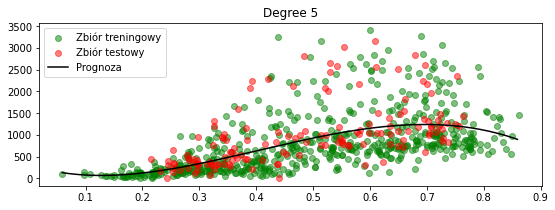

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


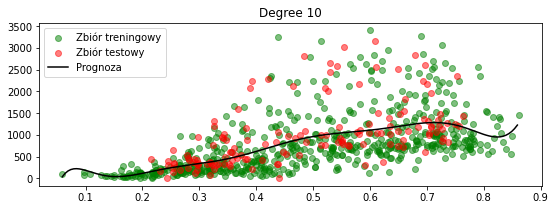

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


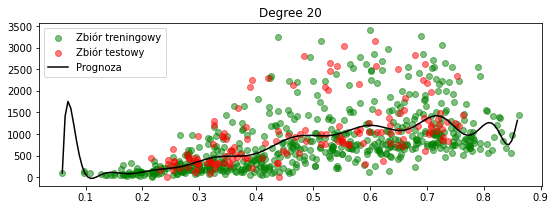

In [31]:
from sklearn.preprocessing import PolynomialFeatures

# tworzymy puste listy gdzie umieszczane będą metryki oceniające
r_2_train_list = []
rmse_train_list = []
rmse_test_list = []

# Tworzymy X, który zostanie wykorzystany dla wizualizacji naszego modelu
X_linespace = np.arange(X.min()[0], X.max()[0], step=0.005).reshape(-1, 1)
for degree in [1, 2, 3, 5, 10, 20]:

    # Transformacja naszego X
    poly_transformer = PolynomialFeatures(degree=degree)
    X_train_transformed = poly_transformer.fit_transform(X_train)

    # Trenowanie naszego modelu
    polynomial_regression = LinearRegression()
    polynomial_regression.fit(X_train_transformed, y_train)
    plt.figure(figsize=(9, 3))

    # Wizualizacja wartości ze zbioru treningowego oraz testowgo
    plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Zbiór treningowy')
    plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Zbiór testowy')

    ########## Wizualizacja wielomianu ##########
    y_fitted = polynomial_regression.predict(poly_transformer.transform(X_linespace))
    plt.plot(X_linespace, y_fitted, color='black', label='Prognoza')
    plt.title(f'Degree {degree}')
    plt.legend(loc='upper left')
    plt.show()

    # Predykcja modelu na zbiorze treningowym
    prediction_train = polynomial_regression.predict(X_train_transformed)

    # Predykcja modelu na zbiorze testowym - najpierw jednak należy przekształcić zbiór testowy
    X_test_transformed = poly_transformer.transform(X_test)
    prediction_test = polynomial_regression.predict(X_test_transformed)

    # Ocena modeli
    r_2_train_list.append(r2_score(y_train, prediction_train))
    rmse_train_list.append(sqrt(mean_squared_error(y_train, prediction_train)))
    rmse_test_list.append(sqrt(mean_squared_error(y_test, prediction_test)))

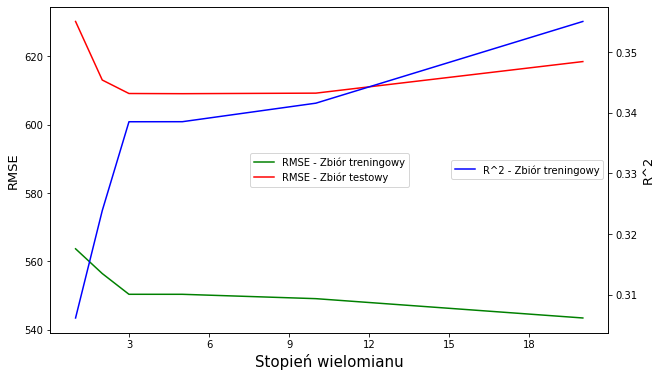

In [32]:
from matplotlib.ticker import MaxNLocator
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.plot([1, 2, 3, 5, 10, 20], rmse_train_list, color='green', label='RMSE - Zbiór treningowy')
ax.plot([1, 2, 3, 5, 10, 20], rmse_test_list, color='red', label='RMSE - Zbiór testowy')
ax.legend(loc='center')
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # Ustawienie typu int dla wartości z osi X
ax.set_ylabel('RMSE', size=13)
ax.set_xlabel('Stopień wielomianu', size=15)

# Dodanie drugiej osi y dla R^2
ax2=ax.twinx()
ax2.plot([1, 2, 3, 5, 10, 20], r_2_train_list, color='blue', label='R^2 - Zbiór treningowy')
ax2.legend(loc='center right')
ax2.set_ylabel('R^2', size=13)

plt.show()

In [32]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False)

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Tworzymy Pipeline - najpierw tworzymy wielomian, następnie uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())

# Nasz model sprawdzi te hiperparametry
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}

# Inicjalizujemy Pipeline
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry, które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)

# Uczymy Grid Search, podajemy X_train - Pipeline za nas zrobi wielomian :)
polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

# Przekazujemy najlepszy estymator
polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'polynomialfeatures__degree': 3} 

RMSE: 609.076780249834


# Regresja wielu zmiennych

In [34]:
# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'polynomialfeatures__degree': 1} 

RMSE: 618.1519697010564


# Regularyzacja (model ElasticNet)

In [35]:
# Importujemy regresję liniową z regularyzacją Lasso i Ridge
from sklearn.linear_model import ElasticNet

# Uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               ElasticNet())

params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'elasticnet__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'elasticnet__l1_ratio': np.arange(0, 1.1, 0.1)}

polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.181e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.663e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.439e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.164e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.176e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.009e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.667e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.121e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.382e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.109e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.605e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.139e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.564e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.235e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.106e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.945e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.604e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.025e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.853e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.279e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.180e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.193e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\P

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.634e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.355e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.298e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.141e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.309e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.178e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.229e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.685e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.251e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.111e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.167e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.665e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.536e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.252e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.757e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.164e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.980e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.695e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.935e+04, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.355e+04, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.695e+05, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.278e+05, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.758e+04, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.859e+05, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.995e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.150e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.590e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.238e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.701e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.637e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.795e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.612e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.244e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.887e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.793e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.608e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.858e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.859e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.524e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.750e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.524e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.157e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.858e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.376e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.073e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.270e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm d

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.711e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.073e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.902e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.711e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.258e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.902e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.376e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.258e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.863e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.162e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.446e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.157e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.446e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.157e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.446e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.750e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.807e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.088e+08, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.629e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.074e+08, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.101e+08, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+08, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.104e+08, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+08, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.103e+08, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+08, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are mor


Najlepsze hiperparametry: {'elasticnet__alpha': 1.0, 'elasticnet__l1_ratio': 1.0, 'polynomialfeatures__degree': 5} 

RMSE: 584.8854667922697


# Model zmiennych kategorycznych

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('standardscaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tworzenie końcowego Pipeline, który będziemy trenować
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', ElasticNet())])

params = {'preprocessor__num__polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'regressor__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'regressor__l1_ratio': np.arange(0, 1.1, 0.1)}

final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_squared_error',
                                                      cv=cv)

final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")

final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.169e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.884e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.163e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.877e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.423e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.859e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.892e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.283e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.445e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.876e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e+06, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.188e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\P

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.756e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.326e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.689e+06, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.424e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\P

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.284e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.464e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.284e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.891e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.884e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.284e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.464e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.419e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.097e+08, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.130e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.198e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.608e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.134e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.469e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.204e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.615e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.401e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.194e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.985e+06, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.660e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.984e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.264e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.581e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.467e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.624e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.211e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.132e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.624e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.132e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.624e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.038e+08, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.051e+08, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.505e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.667e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.855e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.939e+06, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.486e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.501e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.668e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.844e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.384e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.426e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.956e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.653e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.739e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.194e+06, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.474e+06, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.008e+04, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.877e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.667e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.411e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.140e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.506e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.140e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.506e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.411e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.213e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.244e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.154e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.414e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.953e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.580e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.184e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.154e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.186e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.157e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.415e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.954e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.604e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.210e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\P

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.198e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.172e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.418e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.956e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.635e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.142e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.254e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.446e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.695e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.265e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.440e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.848e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.267e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.580e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.414e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.184e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.414e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.184e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.580e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.952e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.604e+06, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.912e+04, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.892e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\P

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.332e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.821e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\P

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.821e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.879e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.096e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.694e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.883e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.697e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.333e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.875e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.919e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.356e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.855e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.888e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.112e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.108e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.120e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.318e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.867e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.370e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.731e+07, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.179e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.458e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.451e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.820e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.694e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.879e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.694e+07, tolerance: 2.141e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.879e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: 

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+07, tolerance: 1.577e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.096e+07, tolerance: 2.317e+04 Linear regression models with null weight for the l1 regularization term are more efficientl

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.908e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.951e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are mor

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.858e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.210e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.752e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.064e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.973e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.779e+07, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.532e+07, tolerance: 2.317e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.318e+06, tolerance: 2.141e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.767e+07, tolerance: 1.577e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.180e+07, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter


Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.4} 

RMSE: 483.93794140501114


Poniżej wyliczone zostały metryki dla modelu zmiennych kategorycznych w ramach realizacji zadania "pozostałe metryki"

In [45]:
predictions = final_polynomial_regression_model.predict(X_test)
predictions1 = final_polynomial_regression_model.predict(X_train)

Współczynnik determinacji R2

In [47]:
from sklearn.metrics import r2_score
print(f'Train R^2: {r2_score(y_train, predictions1)}')
print(f'Test R^2: {r2_score(y_test, predictions)}')

Train R^2: 0.7010738030778285
Test R^2: 0.5246818862090765


W modelu regresji liniowej jednej zmiennej numerycznej wartość R2 dla danych treningowych wyniosła ok. 0,3. W modelu zmiennych kategorycznych wartość tej metryki jest wyższa i wynosi ok. 0,7 dla danych treningowych i ok. 0,52 dla danych testowych.

Wartość R2 powinna znajdować się w przedziale od 0 do 1. Czym wyższa wartość, tym lepiej, bo świadczy o lepszym dopasowaniu modelu.

MAE - Mean Absolute Error (średni błąd absolutny)

In [48]:
from sklearn.metrics import mean_absolute_error
print(f'Train MAE: {mean_absolute_error(y_train, predictions1)}')
print(f'Test MAE: {mean_absolute_error(y_test, predictions)}')

Train MAE: 261.29842739830866
Test MAE: 348.5851935515566


W modelu regresji liniowej jednej zmiennej numerycznej wartość MAE wyniosła 404.8339599752615 dla danych treningowych i 391.02879410802956 dla danych testowych.
W modelu zmiennych kategorycznych wartość tej metryki jest niższa i wynosi odpowiednio 261.29842739830866 i 348.5851935515566.

Wartość MAE wskazuje o ile model myli się w wyliczeniu zmiennej y. Czym wyższa wartość bezwględna tej metryki, tym większe odchylenie od wartości poszukiwanej y. W analizowanym przypadku wartości tej metryki są niższe od wartości wyliczonych dla modelu jednej zmiennej numerycznej. Zatem należy wnioskować, że model zmiennych kategorycznych jest lepiej dopasowany i myli się średnio o ok. 261 wypożyczeń rowerów, co stanowi 30% średniej dziennej ilości wypożyczeń rowerów (ok. 848 wypożyczeń), podczas gdy w modelu regresji liniowej jednej zmiennej numerycznej wyliczona wartość MAE stanowiła aż 46% średniej.

MAPE - Mean Absolute Percentage Error (średni błąd procentowy)

In [49]:
from sklearn.metrics import mean_absolute_percentage_error
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, predictions1)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, predictions)}')

Train MAPE: 0.7443187889204681
Test MAPE: 0.8593319730028237


W modelu regresji liniowej jednej zmiennej numerycznej wartość MAPE wyniosła 0.9668581511778538 dla danych treningowych i 2.9864925318560496 dla danych testowych.
W modelu zmiennych kategorycznych wartość tej metryki jest niższa i wynosi odpowiednio 0.7443187889204681 i 0.8593319730028237.

MAPE informuje o średniej wielkości błędów prognoz wyrażonych w procentach rzeczywistych wartości zmiennej prognozowanej. Czym wyższa wartość tej metryki, tym większe bezwzględne odchylenie procentowe od wartości poszukiwanej y. W analizowanym przypadku wartości tej metryki są niższe od wartości wyliczonych dla modelu jednej zmiennej numerycznej. Zatem należy wnioskować, że model zmiennych kategorycznych jest lepiej dopasowany i myli się średnio o ok. 85%, podczas gdy w modelu regresji liniowej jednej zmiennej numerycznej wyliczona wartość MAPE wyniosła prawie 300%.

MSE - Mean Squared Error (średni błąd kwadratowy)

In [50]:
from sklearn.metrics import mean_squared_error
print(f'Train MSE: {mean_squared_error(y_train, predictions1)}')
print(f'Test MSE: {mean_squared_error(y_test, predictions)}')

Train MSE: 136897.75284013434
Test MSE: 234195.93113132


W modelu regresji liniowej jednej zmiennej numerycznej wartość MSE wyniosła 317745.94124252343 dla danych treningowych i 397066.9447179113 dla danych testowych.
W modelu zmiennych kategorycznych wartość tej metryki jest niższa i wynosi odpowiednio 136897.75284013434 i 234195.93113132.

Metryka MSE obliczana jest dla serii pomiarów, które podlegają przypadkowym odchyleniom od wartości oczekiwanej. Czym wyższa wartość tej metryki, tym gorsze dopasowanie modelu. W analizowanym przypadku wartości tej metryki są niższe od wartości wyliczonych dla modelu regresji liniowej jednej zmiennej numerycznej.

RMSE – Root Mean Squared Error (pierwiastek błędu średniokwadratowego)

In [51]:
from math import sqrt
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, predictions1))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

Train RMSE: 369.99696328501716
Test RMSE: 483.93794140501114


W modelu regresji liniowej jednej zmiennej numerycznej wartość RMSE wyniosła 563.6895787953894 dla danych treningowych i 630.1324818781454 dla danych testowych.
W modelu zmiennych kategorycznych wartość tej metryki jest niższa i wynosi odpowiednio 369.99696328501716 i 483.93794140501114.

Wartość metryki RMSE nie może być mniejsza od wartości MAE. Różnica pomiędzy RMSE a MAE wskazuje na dużą skalę błędów modelu. Zarówno w modelu regresji liniowej jednej zmiennej, jak i w badanym przypadku występuje rozbieżność pomiędzy wartościami tej metryki a MAE, jednakże w modelu zmiennych kategorycznych różnica wartości dla danych testowych jest zdecydowanie mniejsza niż w modelu regresji, co może wskazywać na lepsze dopasowanie powyższego modelu.

Wykres reszt

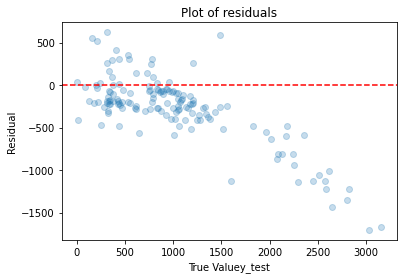

In [52]:
errors = predictions - y_test
plt.scatter(x = y_test, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()

Wykres reszt powinien przypominać chmurę, aby stwierdzić, że błędy wynikają z szumu w danych. Poza tym jeśli na wykresie reszt widoczna jest zależność, to znaczy, że nie w pełni wyjaśniona została zmienność.
Powyższy wykres reszt modelu zmiennych kategorycznych raczej chmury nie przypomina i przedstawia słabą zależności, podczas gdy wykres ten sporządzony dla modelu regresji liniowej jednej zmiennej numerycznej zarówno był podobny do chmury, jak i wykazywał zależność. Analizowany powyżej przypadek przedstawia lepsze dopasowanie niż uprzednio badany model.

Histogram reszt

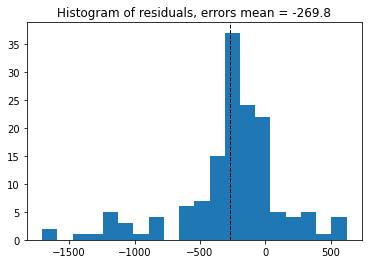

In [53]:
plt.hist(errors, bins = 20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

Histogram reszt informuje czy i w jaką stronę model jest obiążony, czyli czy średnia reszt jest przesunięta względem zera (wtedy przeszacowujemy bądź niedoszacowujemy) oraz czy rozkład reszt jest np. skośny (nie w pełni wyjaśnia wariancję).
W analizowanym przypadku, jak i w modelu regresji liniowej jednej zmiennej numerycznej średnia reszt jest przesunięta na lewo od zera, z tym że tamtego modelu wyniosła -209,68, a dla powyższego jest to -269,8. Oba modele niedoszacowują. Także rozkład reszt w obu przypadkach jest skośny.